In [2]:
# Importar bibliotecas
import pandas as pd
import plotnine as p9 # !pip install plotnine 
import os
# Tabela de dados de exemplo
dados = pd.read_csv(
  "https://aluno.analisemacro.com.br/download/48021/?tmstv=1679765942"
  ).assign(Year = lambda x: pd.to_datetime(x.Year))
dados

,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population
0,United States,USA,1961-01-01,5.633000e+11,2.300000,13.708284,4.029824,4.899698,183691000
1,United States,USA,1962-01-01,6.051000e+11,6.100000,13.872615,4.131549,4.809122,186538000
2,United States,USA,1963-01-01,6.386000e+11,4.400000,14.044590,4.087065,4.870028,189242000
3,United States,USA,1964-01-01,6.858000e+11,5.800000,14.224207,4.097404,5.103529,191889000
4,United States,USA,1965-01-01,7.437000e+11,6.400000,14.449685,4.235579,4.988571,194303000
...,...,...,...,...,...,...,...,...,...
166,Brazil,BRA,2013-01-01,2.472807e+12,3.010306,119.372104,13.931678,11.630182,202408632
167,Brazil,BRA,2014-01-01,2.455994e+12,0.508210,126.927347,13.673463,11.011943,204213133
168,Brazil,BRA,2015-01-01,1.802214e+12,-3.549767,138.388641,14.053435,12.900191,205962108
169,Brazil,BRA,2016-01-01,1.793989e+12,-3.468163,150.482602,12.079664,12.494619,207652865


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Country     171 non-null    object        
 1   Code        171 non-null    object        
 2   Year        171 non-null    datetime64[ns]
 3   GDP         171 non-null    float64       
 4   Growth      171 non-null    float64       
 5   CPI         127 non-null    float64       
 6   Imports     170 non-null    float64       
 7   Exports     170 non-null    float64       
 8   Population  171 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 12.2+ KB


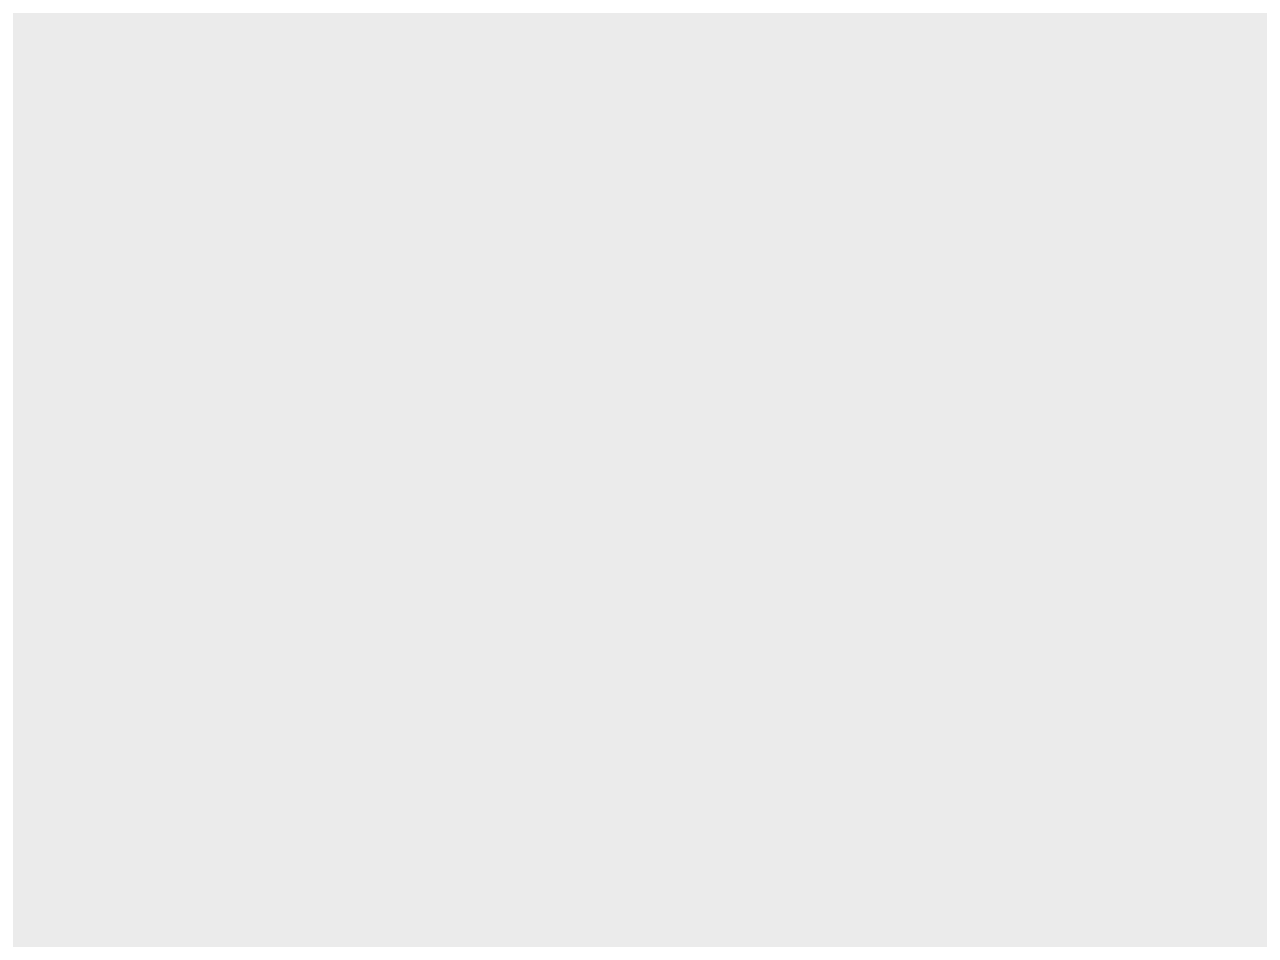

In [4]:
p9.ggplot(data=dados)

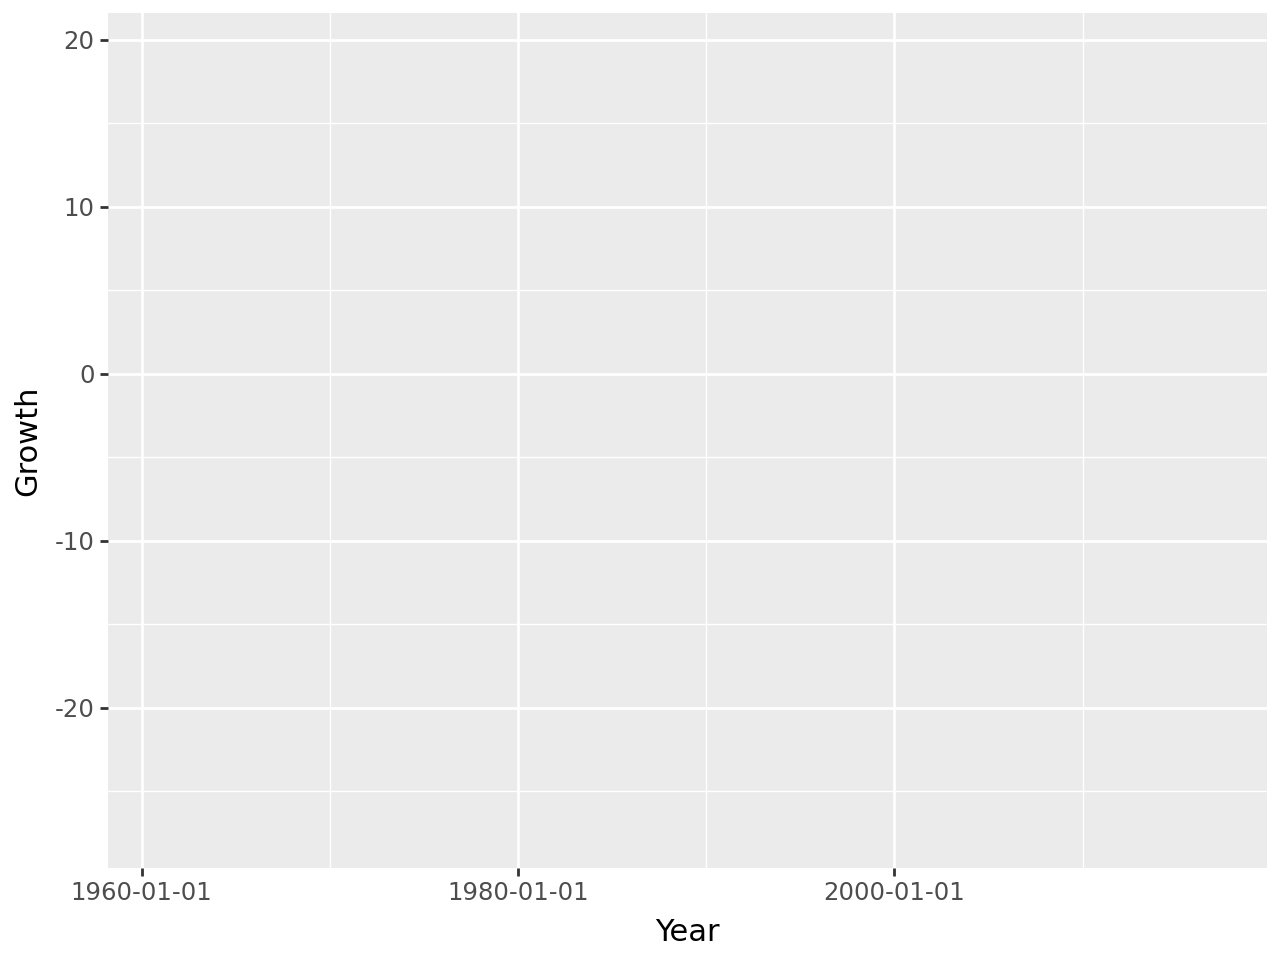

In [5]:
p9.ggplot(data = dados) + p9.aes(x = "Year", y = "Growth")

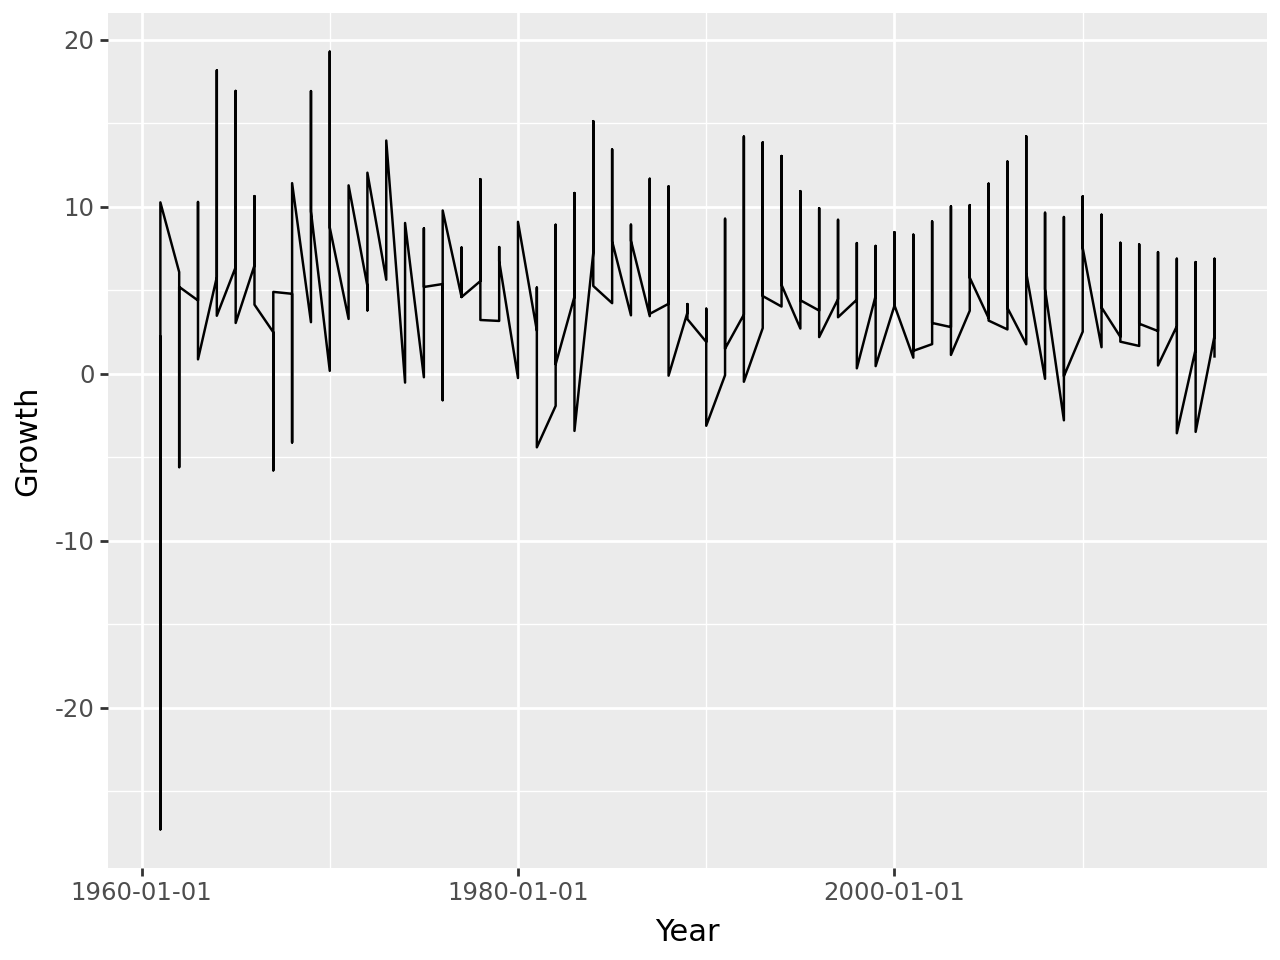

In [6]:
p9.ggplot(data = dados) +\
  p9.aes(x = "Year", y = "Growth") +\
  p9.geom_line()

[*********************100%***********************]  1 of 1 completed
/home/eco/Analise_Macro/venv/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:99: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


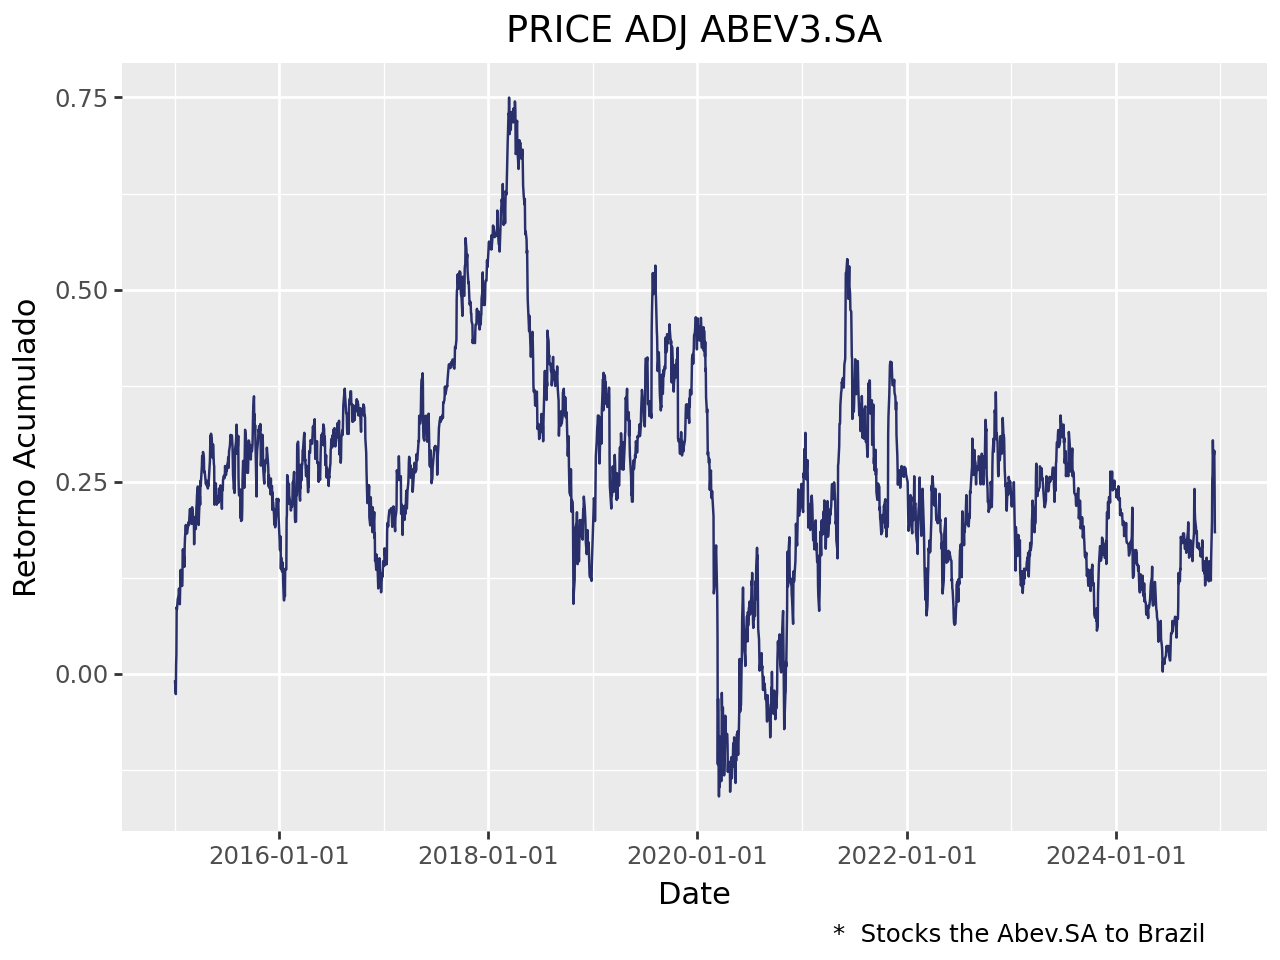

In [7]:
import yfinance as yf
abev=yf.download('ABEV3.SA',start='2014-12-30',end='2024-12-14')['Adj Close'].rename(columns={'ABEV3.SA':'Price'})
abev=abev.reset_index(inplace=False)#.assign(date=lambda x:pd.to_datetime(x.Date))
abev['Retorno']=abev['Price'].pct_change().dropna()
abev['Retorno_acumulado']=(1+abev['Retorno']).cumprod()-1
#retorno_acumulado_df=retorno_acumulado.reset_index()
#retorno_acumulado_df.columns=['Date','Retorno']
grafico=(p9.ggplot(data=abev)+
         p9.aes(x='Date',y='Retorno_acumulado')+
         p9.geom_line(color='#282f6b')+
         p9.scale_x_date(breaks='2 years')+
         p9.ggtitle('PRICE ADJ ABEV3.SA')+
         p9.xlab('Date') + 
         p9.ylab('Retorno Acumulado')+
         p9.labs(caption='*  Stocks the Abev.SA to Brazil        '))
#grafico
grafico


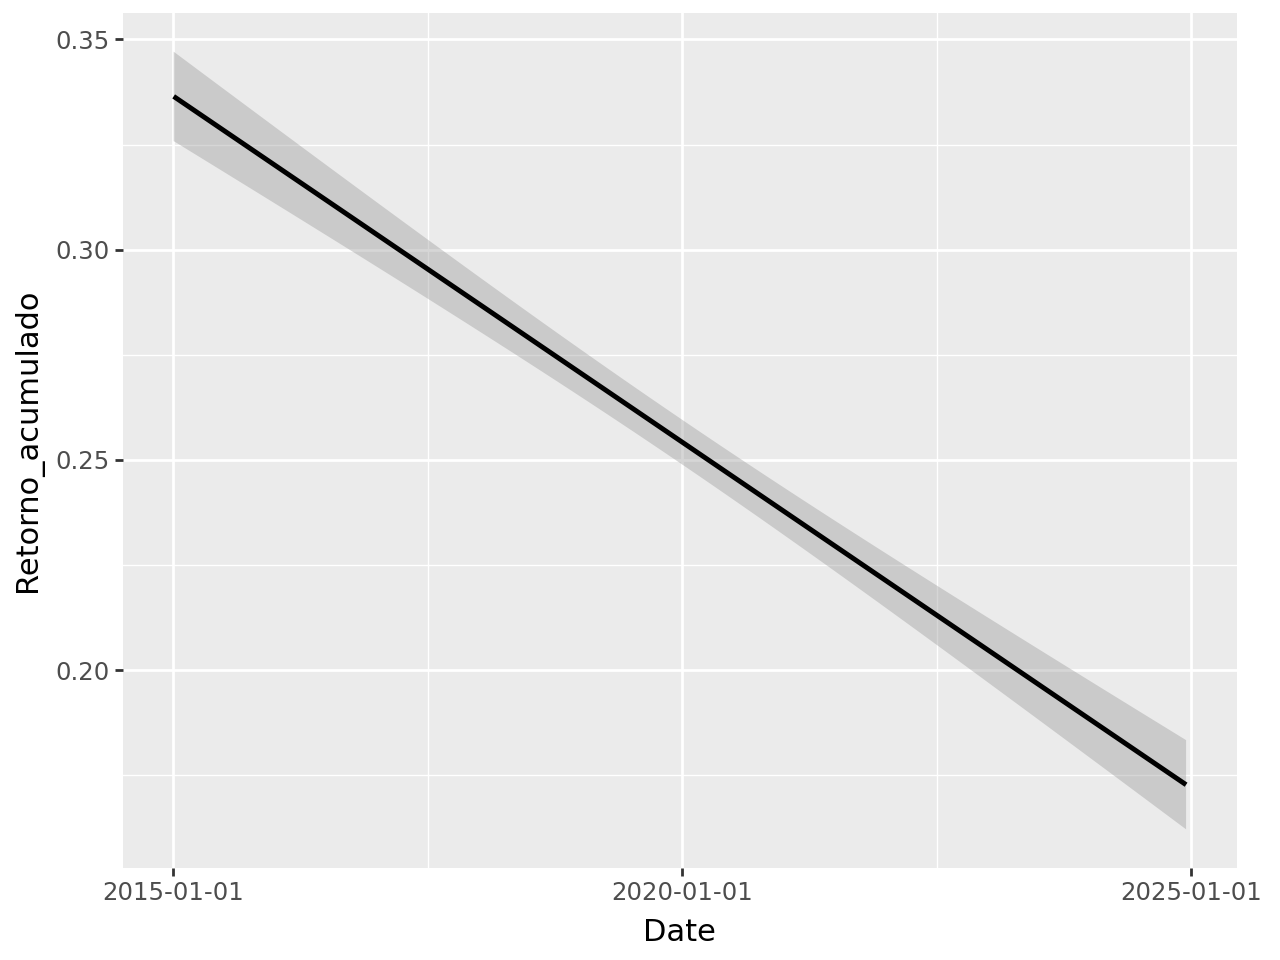

In [70]:
grafico_test=p9.ggplot(data=abev)+ p9.aes(x='Date',y='Retorno_acumulado')
grafico_test +p9.geom_smooth()

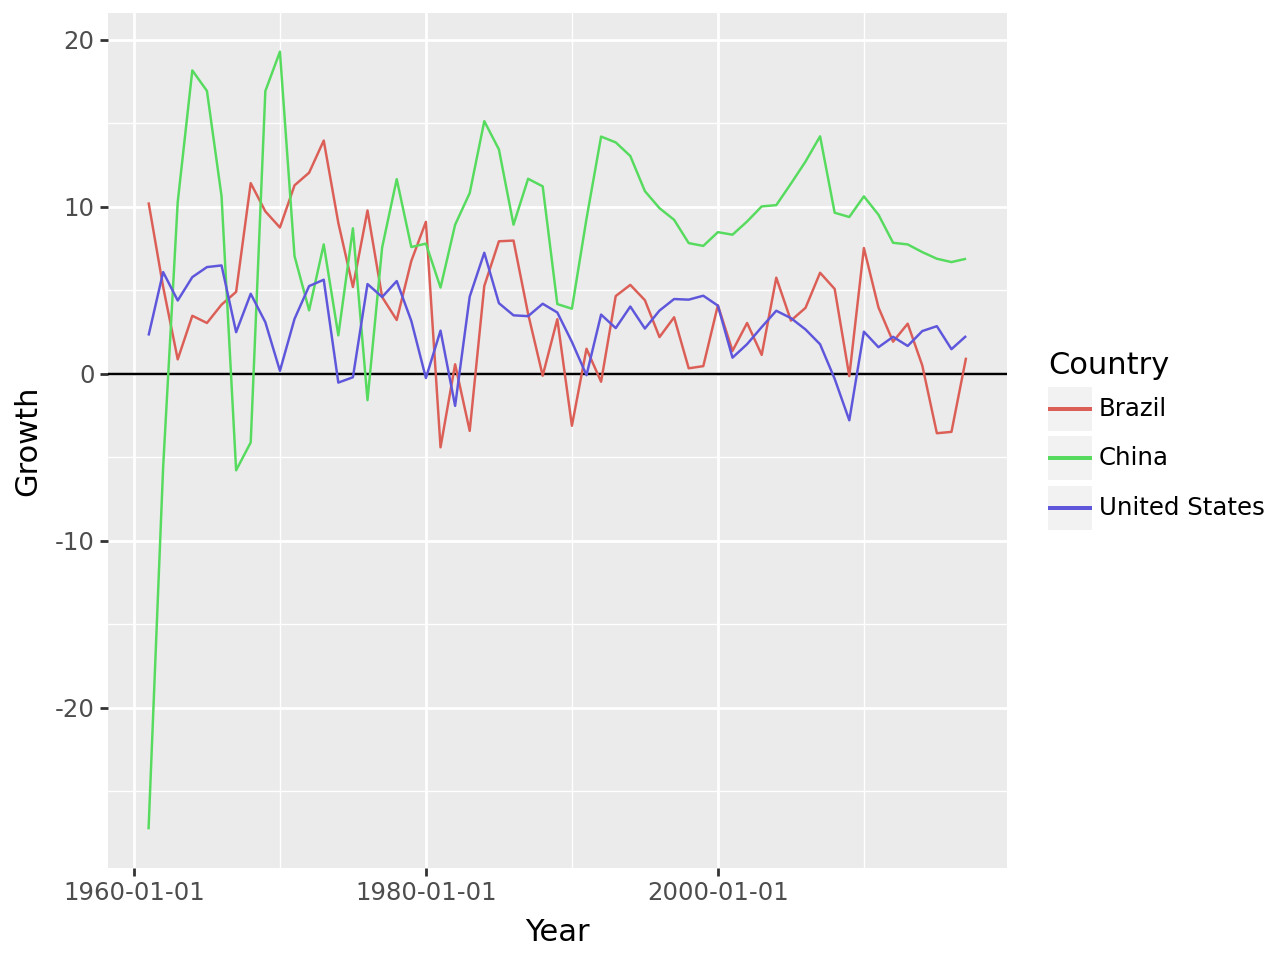

In [8]:
grafico = (p9.ggplot(data = dados) +
  p9.aes(x = "Year", y = "Growth", color = "Country") +
  p9.geom_hline(yintercept = 0) +
  p9.geom_line())
grafico

In [9]:
intervalo = range(
  dados.Growth.astype(int).min(),
  dados.Growth.astype(int).max(),
  6
  )

In [10]:
grafico = (grafico +
  p9.scale_x_date( # altera eixo de datas
    breaks      = "10 years",
    date_labels = "%Y"
    ) +  # altera eixo de números
  p9.scale_y_continuous(breaks = intervalo) +
  p9.scale_color_manual( # altera cores
    values = ["#282f6b", "#7f7f7f", "#7f7f7f"]
    ) + # altera escala de tamanhos
  p9.aes(size = "Country") + # melhor no início
  p9.scale_size_manual(values = [1.5, 0.7, 0.7]))

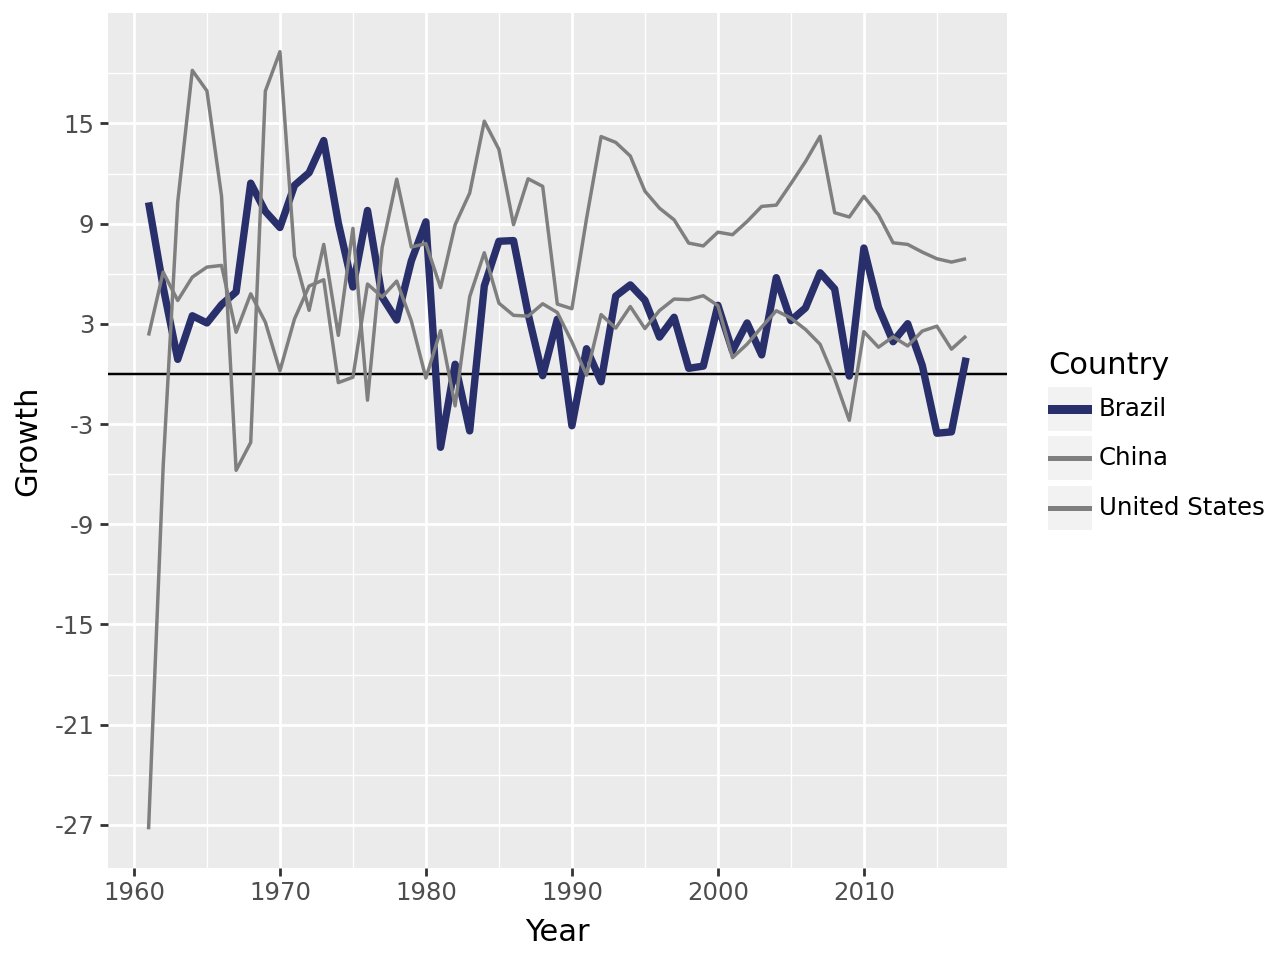

In [11]:
grafico

In [12]:
grafico = (p9.ggplot(data = dados) +
  p9.aes(
    x     = "Year", 
    y     = "Growth", 
    color = "Country",
    size  = "Country"
    ) +
  p9.geom_hline(yintercept = 0) +
  p9.geom_line() +
  p9.scale_x_date(
    breaks      = "10 years", 
    date_labels = "%Y"
    ) +
  p9.scale_y_continuous(breaks = intervalo) +
  p9.scale_color_manual(
    values = ["#282f6b", "#7f7f7f", "#7f7f7f"]
    ) +
  p9.scale_size_manual(
    values = [1.5, 0.7, 0.7]
    ) +
  p9.ggtitle("Crescimento anual do PIB") +
  p9.ylab("%") +
  p9.xlab("Ano") +
  p9.labs(
    color    = "",
    size     = "",
    caption  = "Nota: Países selecionados | Fonte: Banco Mundial"
    ) +
  p9.theme_light() +
  p9.theme(
    plot_title = p9.element_text(face = "bold"),
    plot_caption = p9.element_text(margin = {"t": 15}),
    legend_position = "right"
    ))
print(grafico)

<ggplot: (640 x 480)>


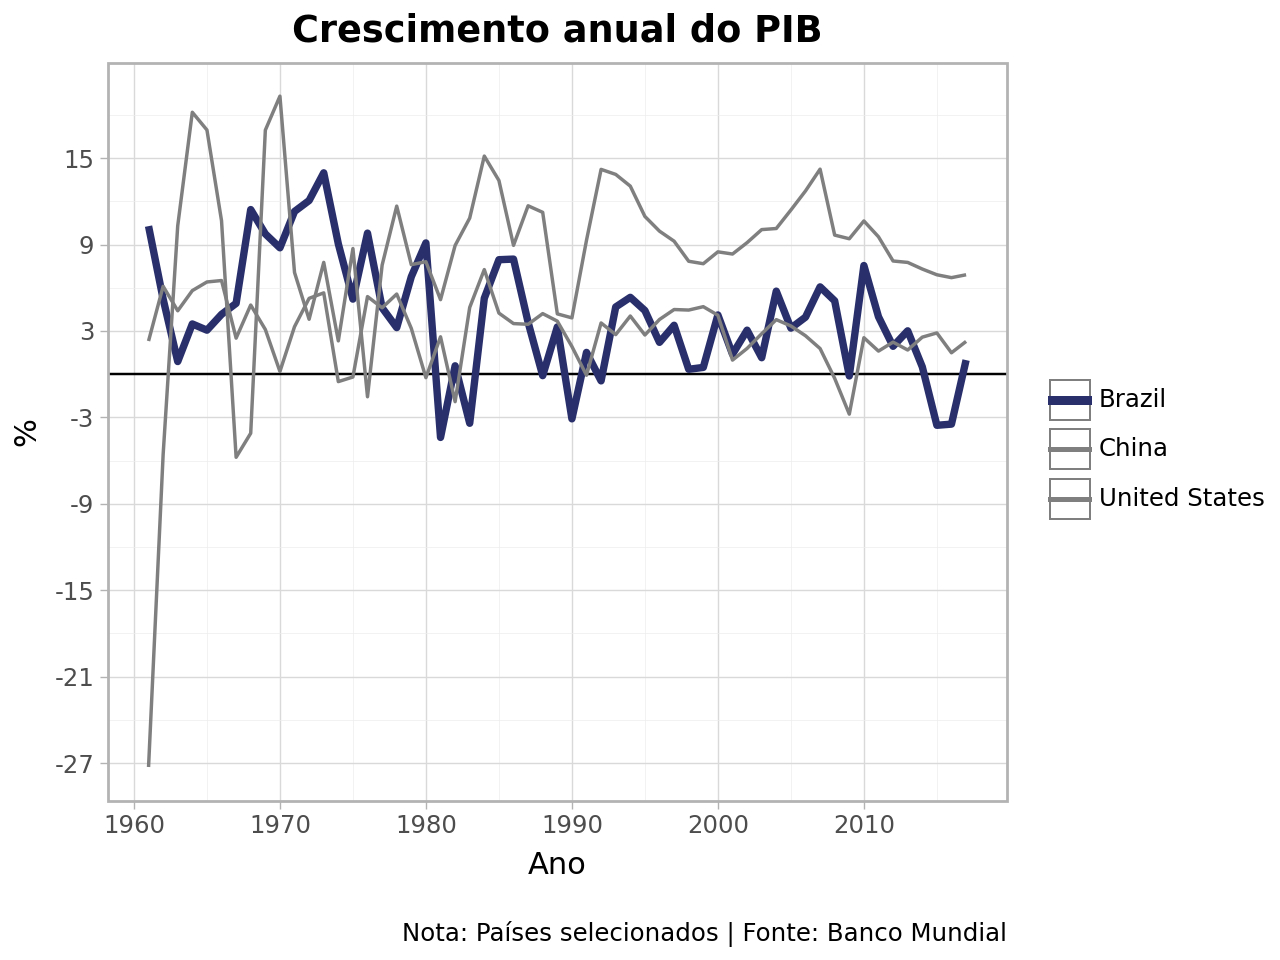

In [13]:
grafico

In [14]:
dados

,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population
0,United States,USA,1961-01-01,5.633000e+11,2.300000,13.708284,4.029824,4.899698,183691000
1,United States,USA,1962-01-01,6.051000e+11,6.100000,13.872615,4.131549,4.809122,186538000
2,United States,USA,1963-01-01,6.386000e+11,4.400000,14.044590,4.087065,4.870028,189242000
3,United States,USA,1964-01-01,6.858000e+11,5.800000,14.224207,4.097404,5.103529,191889000
4,United States,USA,1965-01-01,7.437000e+11,6.400000,14.449685,4.235579,4.988571,194303000
...,...,...,...,...,...,...,...,...,...
166,Brazil,BRA,2013-01-01,2.472807e+12,3.010306,119.372104,13.931678,11.630182,202408632
167,Brazil,BRA,2014-01-01,2.455994e+12,0.508210,126.927347,13.673463,11.011943,204213133
168,Brazil,BRA,2015-01-01,1.802214e+12,-3.549767,138.388641,14.053435,12.900191,205962108
169,Brazil,BRA,2016-01-01,1.793989e+12,-3.468163,150.482602,12.079664,12.494619,207652865


In [20]:
brasil=dados.query('Country =="Brazil"').assign(indece=lambda x:x.Year).set_index('indece')
brasil

,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population
indece,,,,,,,,,
1961-01-01,Brazil,BRA,1961-01-01,1.523685e+10,10.275912,NaN,7.339459,7.279408,74351763
1962-01-01,Brazil,BRA,1962-01-01,1.992629e+10,5.216059,NaN,5.188974,3.868760,76573248
1963-01-01,Brazil,BRA,1963-01-01,2.302148e+10,0.874673,NaN,9.111000,9.036454,78854019
1964-01-01,Brazil,BRA,1964-01-01,2.121189e+10,3.485582,NaN,5.677600,6.385409,81168654
1965-01-01,Brazil,BRA,1965-01-01,2.179004e+10,3.053488,NaN,5.555925,7.735761,83498020
1966-01-01,Brazil,BRA,1966-01-01,2.706272e+10,4.150360,NaN,5.991669,6.824735,85837799
1967-01-01,Brazil,BRA,1967-01-01,3.059183e+10,4.915266,NaN,5.768971,5.768971,88191378
1968-01-01,Brazil,BRA,1968-01-01,3.387588e+10,11.427282,NaN,6.610384,6.000526,90557064
1969-01-01,Brazil,BRA,1969-01-01,3.745890e+10,9.735827,NaN,6.553713,6.620404,92935072


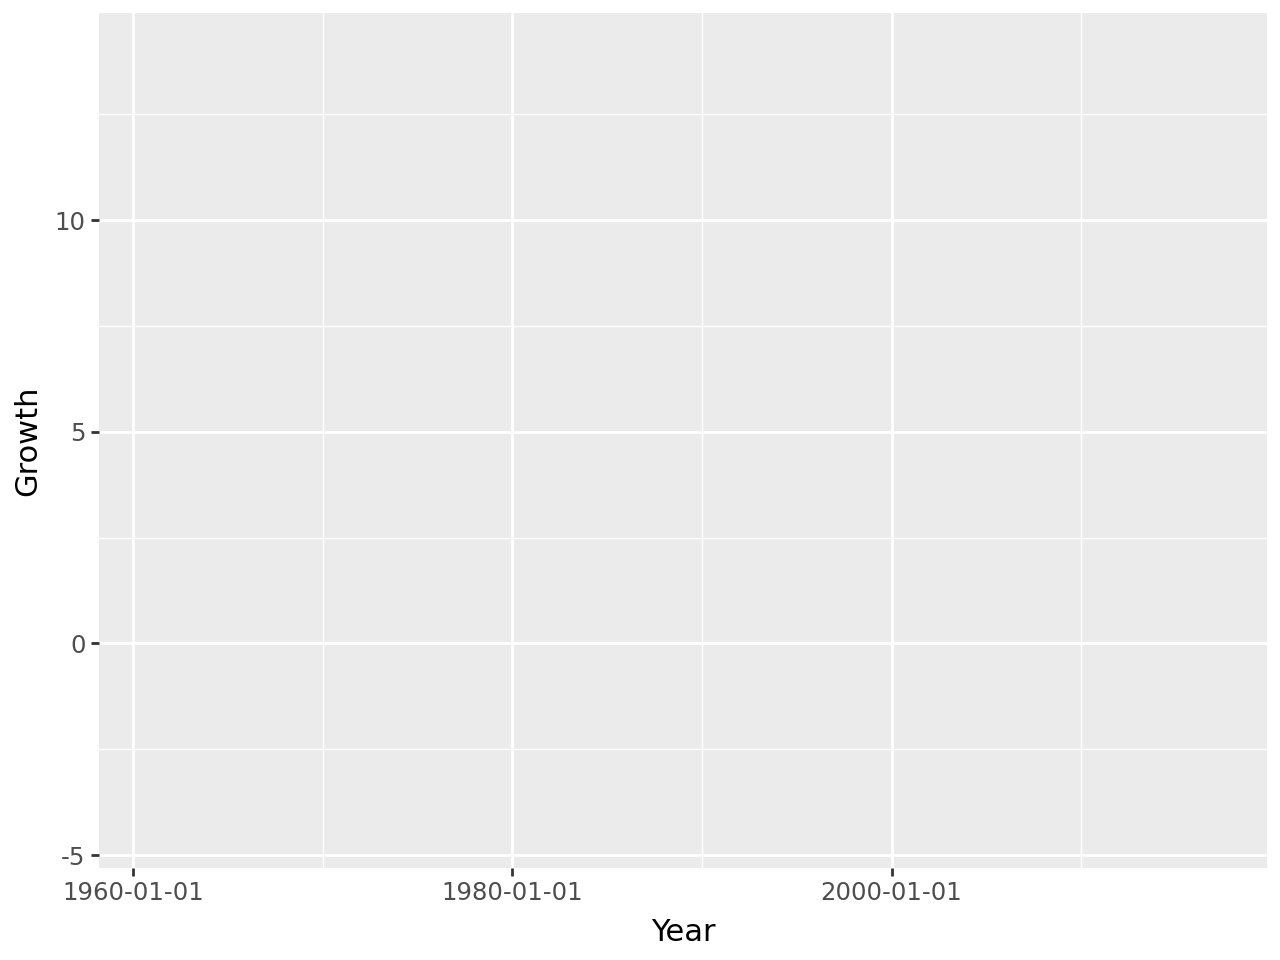

In [27]:
base=p9.ggplot(data=brasil)+ p9.aes(x='Year',y='Growth')
base

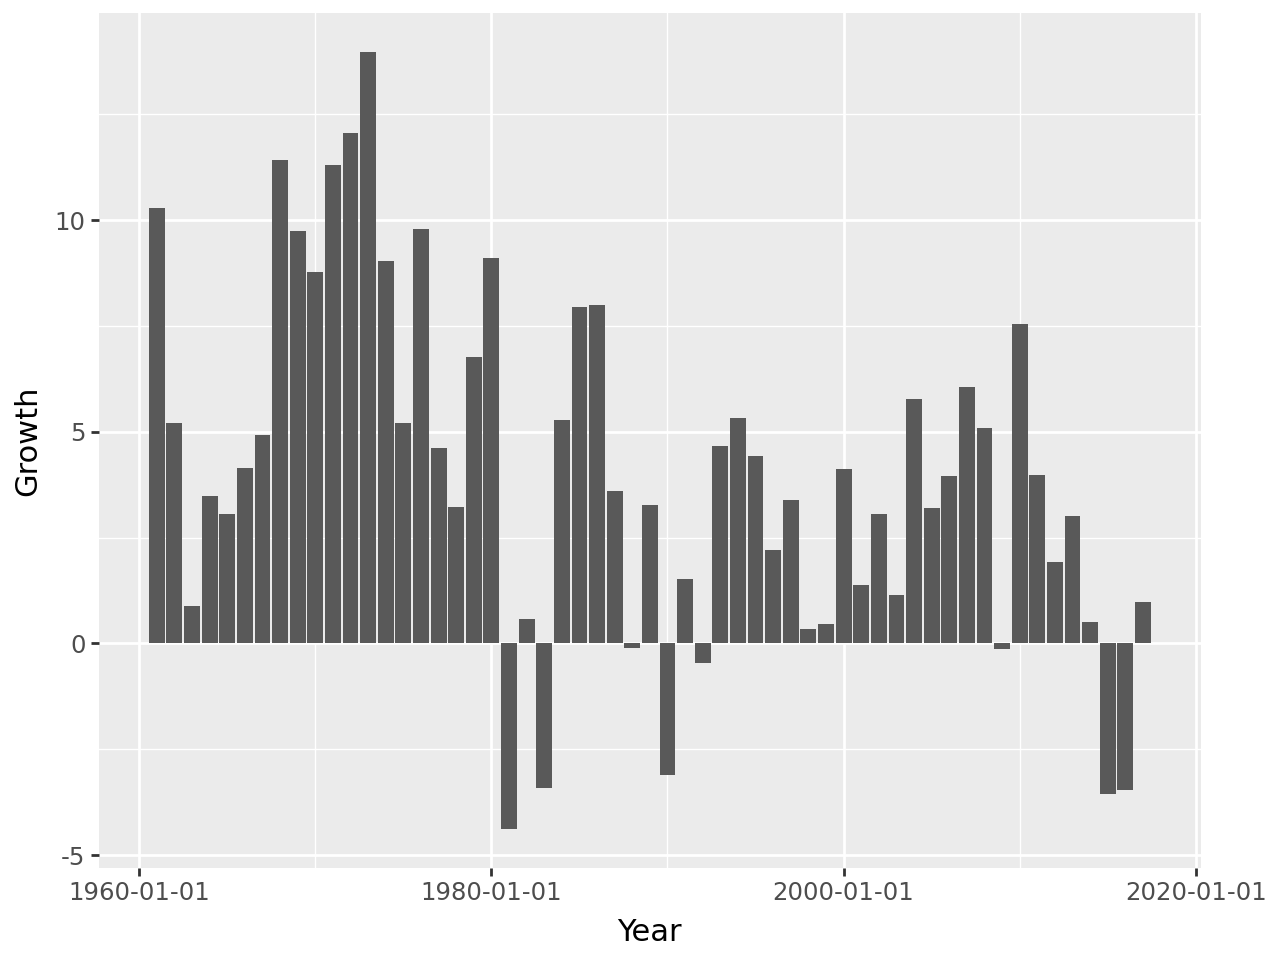

In [29]:
base+p9.geom_col()

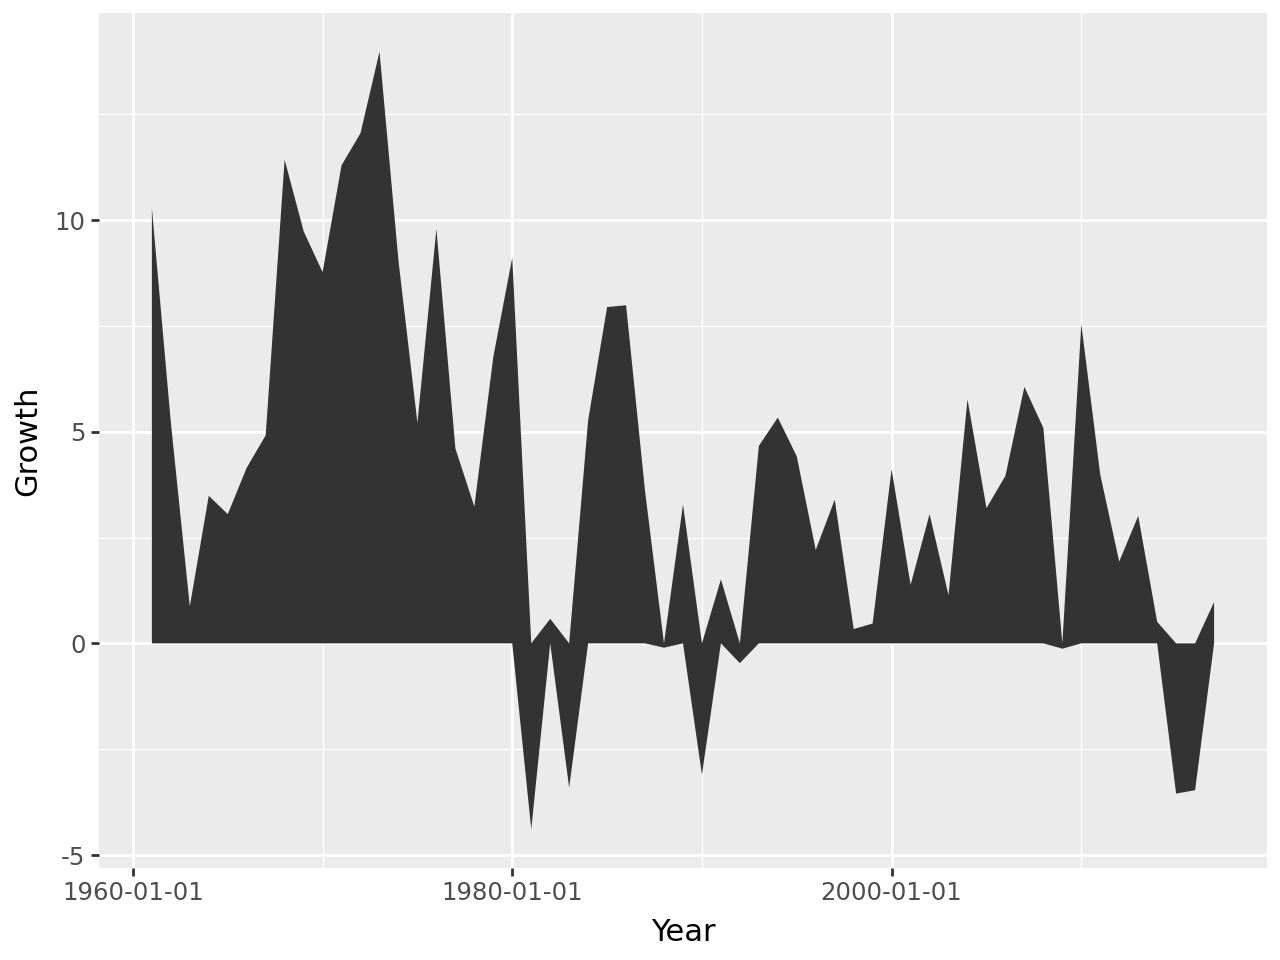

In [30]:
base+p9.geom_area()

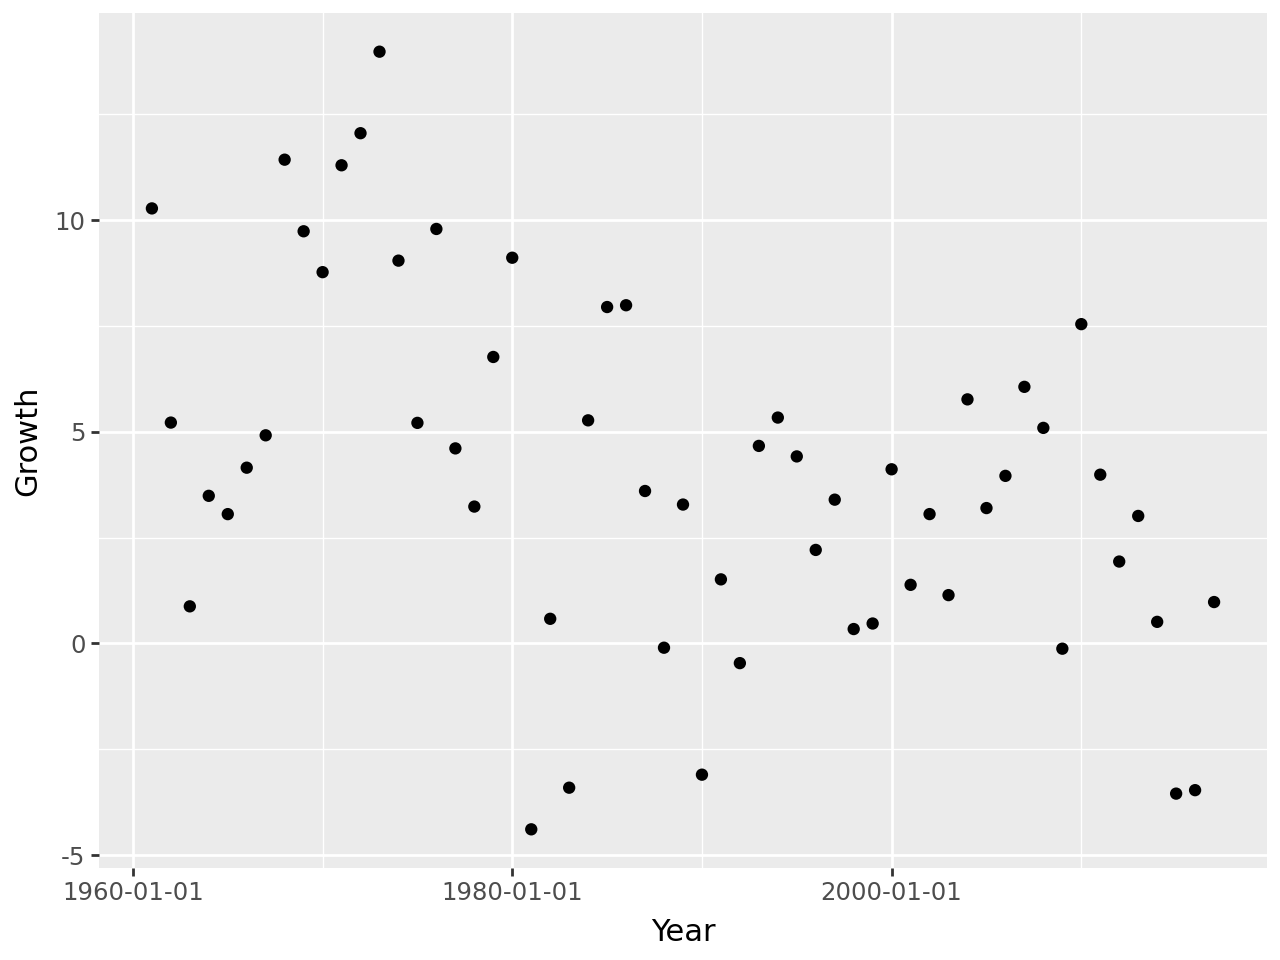

In [34]:
base+p9.geom_point()

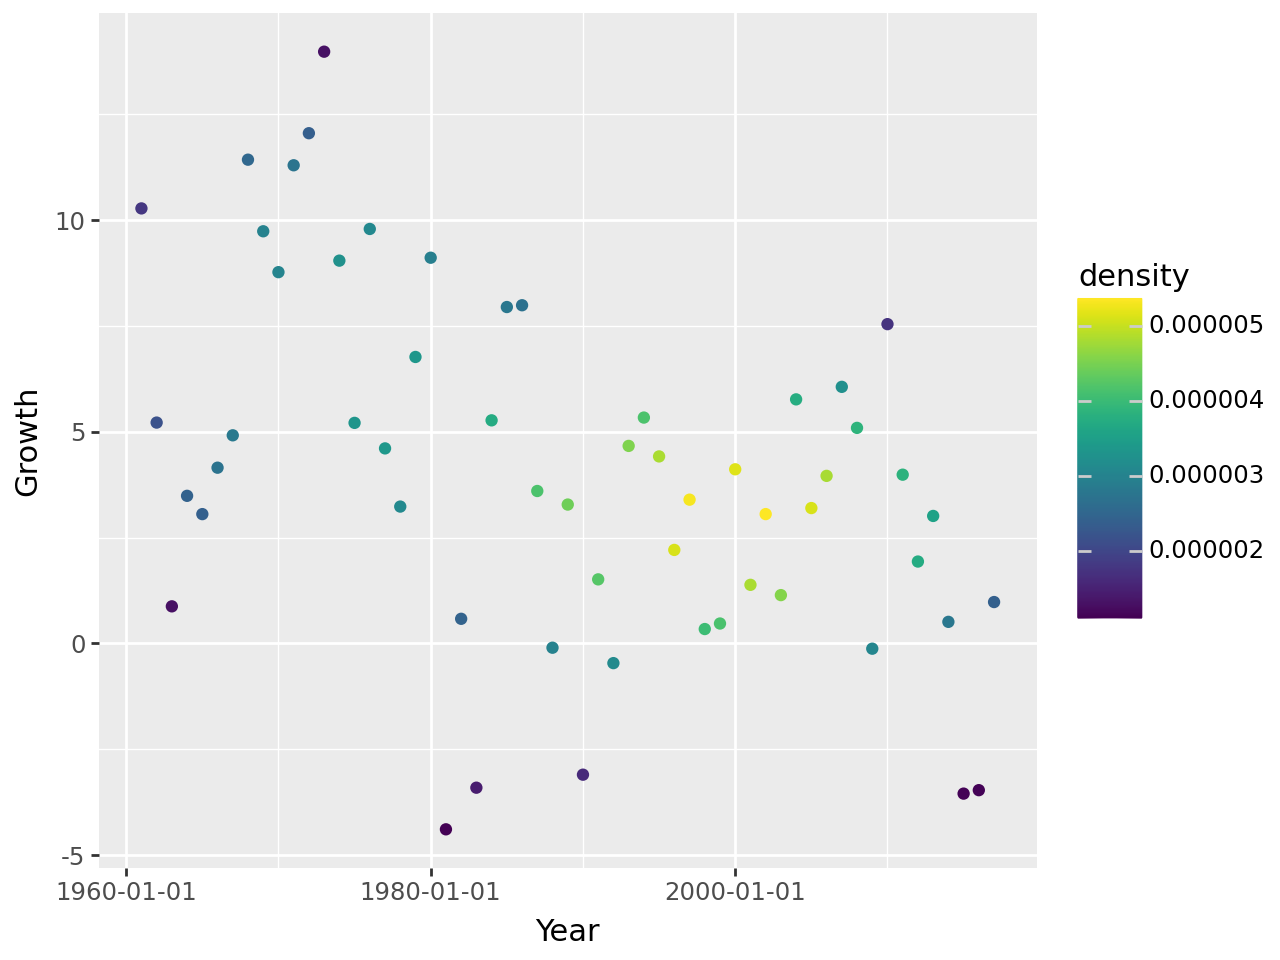

In [36]:
base+p9.geom_pointdensity()

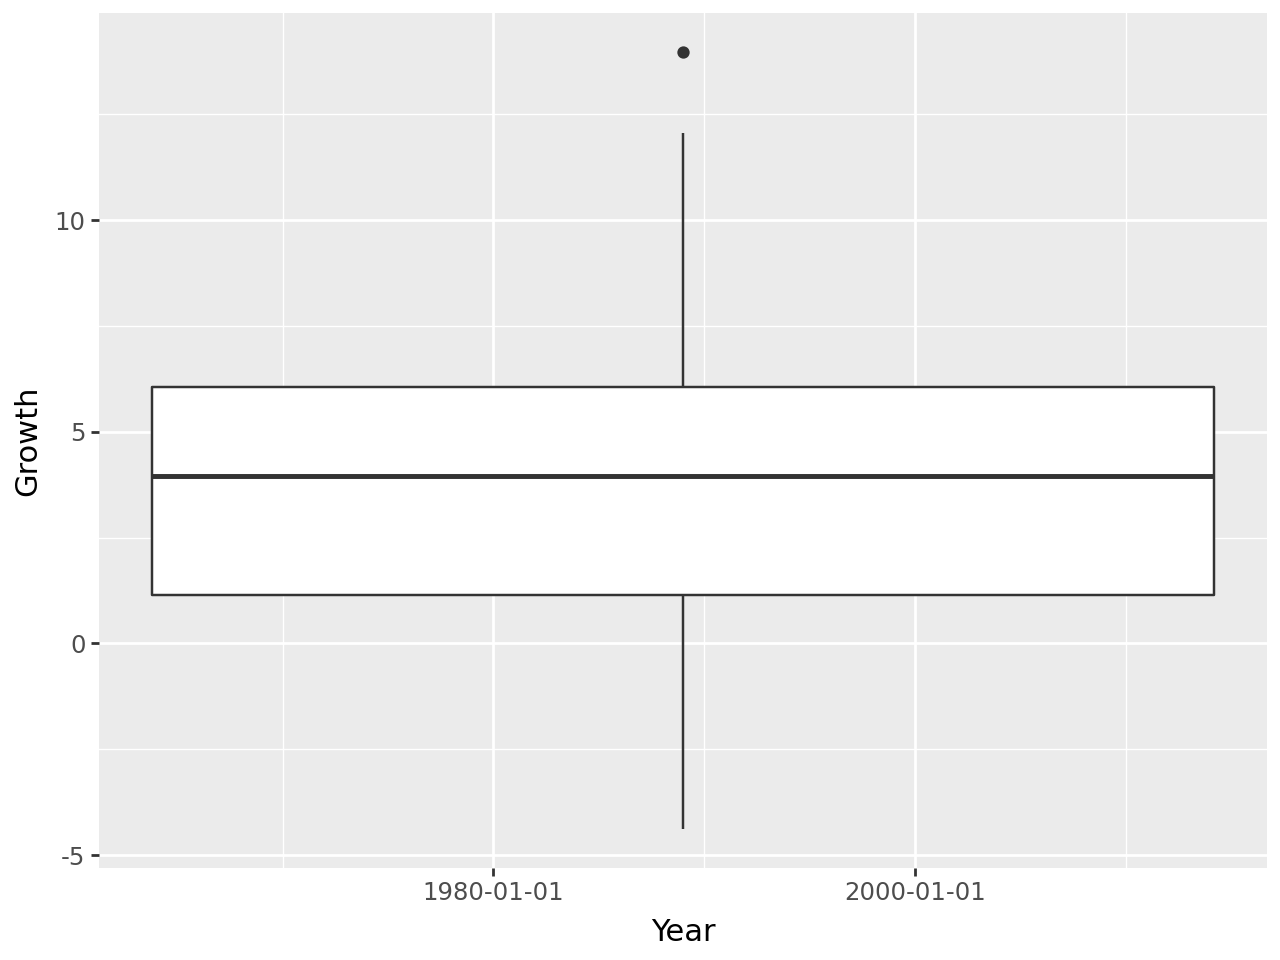

In [45]:
base+p9.geom_boxplot()